<a href="https://colab.research.google.com/github/williamedwardhahn/ComplexSystems/blob/main/Complex_Systems_Lab_Dual_Numbers_Linear_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://cdn-images-1.medium.com/max/1600/1*IjxpxWcKX8EJUVFBNFeKdA.gif)

![alt text](https://cdn-images-1.medium.com/max/1600/1*pwPIG-GWHyaPVMVGG5OhAQ.gif)

[Interactive Least Squares](http://setosa.io/ev/ordinary-least-squares-regression/)

[Linear Fit](http://mathlets.org/mathlets/linear-regression/)

In [1]:
%matplotlib inline
from IPython.display import HTML
from numpy import *
import matplotlib.pyplot as plt
from numpy import arange,array,ones
from scipy import stats
import numpy as np
import time


##Linear Fit Using Scipy Stats Package

In [2]:
x = arange(0,9)

In [3]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [4]:
y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]

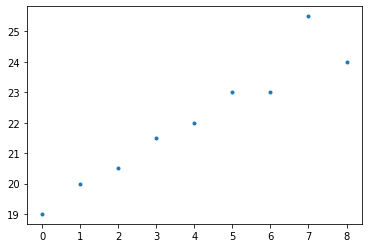

In [5]:
plt.plot(x,y,'.')

In [6]:
# Generated linear fit using builtin function as ground truth for testing
slope, intercept = stats.linregress(x,y)[0:2]

In [7]:
slope

0.7166666666666667

In [8]:
intercept

19.18888888888889

In [9]:
# y = mx + b
line = slope*x + intercept

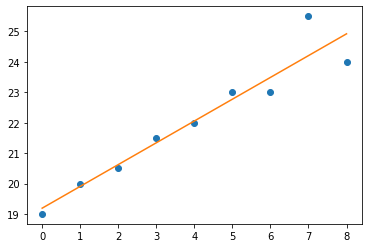

In [10]:
plt.plot(x,y,'o', x, line)

#Matrix Dual Numbers

In [11]:
import numpy as np
from numpy.linalg import matrix_power

$x=
  \begin{bmatrix}
    x & 1  \\
    0 & x 
  \end{bmatrix} $ Dual Matrix: used when differentiating with respect to $x$

$x=
  \begin{bmatrix}
    x & 0  \\
    0 & x 
  \end{bmatrix} $ Real Matrix: used when treating $x$ as a constant

A dual number is a number $a+b\epsilon$, where $a,b\in\mathbb{R}$ and $\epsilon$ is a matrix with the property that $\epsilon^2=0$

$\epsilon=\begin{bmatrix}
    0 & 1  \\
    0 & 0 
  \end{bmatrix}$

$d=\begin{bmatrix}
    x & 1  \\
    0 & x 
  \end{bmatrix}$

$d^2 = \begin{bmatrix}
    x & 1  \\
    0 & x 
  \end{bmatrix}*\begin{bmatrix}
    x & 1  \\
    0 & x 
  \end{bmatrix}=\begin{bmatrix}
    x^2 & 2x  \\
    0 & x^2 
  \end{bmatrix}$

$\begin{bmatrix}
    0 & 1  \\
    0 & 0 
  \end{bmatrix}*\begin{bmatrix}
    0 & 1  \\
    0 & 0 
  \end{bmatrix}=\begin{bmatrix}
    0 & 0  \\
    0 & 0 
  \end{bmatrix}$

$\epsilon^2 = 0$

$\begin{equation}
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a)
\end{equation}$

$\begin{equation}
f(a+b\epsilon) = \sum_{n=0}^{\infty} \frac{f^{(n)}(a)b^n\epsilon^n}{n!} = f(a) + bf^\prime(a)\epsilon
\end{equation}$

In [12]:
def dualmat(x): # already converted to matrix version
  
  x = np.asarray(x)  
  
  return np.array([[x,np.zeros(x.shape)],[np.ones(x.shape),x]])

In [13]:
def realmat(x): # already converted to matrix version
  
  x = np.asarray(x)
  
  return np.array([[x,np.zeros(x.shape)],[np.zeros(x.shape),x]])

In [14]:
m = 0.5
b = 15

M = dualmat(m)
B = dualmat(b)

m = realmat(m)
b = realmat(b)

In [15]:
M

array([[0.5, 0. ],
       [1. , 0.5]])

In [16]:
m

array([[0.5, 0. ],
       [0. , 0.5]])

In [17]:
x = np.arange(0,9) # still need to convert to matrix version
y = np.array([19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]) # still need to converted to matrix version

x = realmat(x) # both x and y are just data, we're not interested in knowing how they affect the accuracy of the network
y = realmat(y)

In [18]:
def partial_loss(m,b): 
  
  L = 0

  for i in range(x.shape[2]):
    
    L += matrix_power(((np.matmul(m,x[:,:,i]) + b) - y[:,:,i]),2) #y=m*x+b
    
  return L

In [19]:
partial_loss(M,b) # differentiating w.r.t. m

array([[ 235.75,    0.  ],
       [-390.  ,  235.75]])

In [20]:
partial_loss(m,B) # differentiating w.r.t. b 

array([[235.75,   0.  ],
       [-91.  , 235.75]])

In [21]:
dL_dm = partial_loss(M,b)

In [22]:
dL_dm

array([[ 235.75,    0.  ],
       [-390.  ,  235.75]])

In [23]:
dL_dm = partial_loss(M,b)[1,0]
dL_db = partial_loss(m,B)[1,0]

In [24]:
dL_dm

-390.0

In [25]:
dL_db

-91.0

In [26]:
#######################

In [27]:
m = 0
b = 0

In [28]:
x0 = np.arange(0,9)
y0 = np.array([19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24])

In [29]:
x = realmat(x0)
y = realmat(y0)

In [30]:
def total_loss(m,b):
  
  Lm = partial_loss(dualmat(m),realmat(b))
  
  Lb = partial_loss(realmat(m),dualmat(b))
      
  return Lm[1,1],Lm[1,0],Lb[1,0]

In [31]:
learning_rate = 0.001
steps = 1000

In [32]:
for i in range(steps):
  
  L,dL_dm,dL_db = total_loss(m,b)
  
  m -= dL_dm * learning_rate
  b -= dL_db * learning_rate

In [33]:
print(m,b)

0.735897936413473 19.081282523560958


In [34]:
y1 = m*x + b

In [35]:
y1.shape

(2, 2, 9)

In [36]:
y1 = y1[0,0,:]

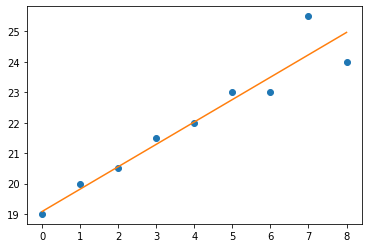

In [37]:
plt.plot(x0,y0,'o')
plt.plot(x0,y1)